<h1 style="text-align: center;"> Tarea 3. Algoritmos de Aprendizaje Supervisado </h1>

<h1 style="text-align: center;"> Dataset Vehicle </h1> 

## 1. Análisis exploratorio de los datos (EDA)

#### a. Carga y Visualización del Dataset

In [2]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Vehicle.csv")

# Mostrar las primeras filas
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### b. Información general del dataset

In [3]:
# Información general del dataset
df.info()

# Resumen estadístico de las variables numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Análisis

El análisis exploratorio del dataset Vehicle.csv revela información clave sobre la estructura y las características de los datos. Se observa que el conjunto de datos consta de 4340 registros y 8 columnas, con una combinación de variables numéricas y categóricas. No hay valores nulos en las columnas, lo que indica que el dataset está completo y no requiere imputación de datos faltantes.

En cuanto a las variables numéricas, se identifican tres atributos: "year" (año de fabricación), "selling_price" (precio de venta) y "km_driven" (kilometraje recorrido). El año promedio de los vehículos en la muestra es aproximadamente 2013, con un rango que va desde 1992 hasta 2020, lo que indica la presencia de autos relativamente antiguos y recientes. La variable "selling_price" muestra una amplia dispersión, con un valor máximo de 8.9 millones, lo que sugiere la existencia de valores extremos que podrían afectar la distribución. Además, el kilometraje promedio es de aproximadamente 66,215 km, con un máximo que supera los 800,000 km, lo que también podría representar datos atípicos.

Respecto a las variables categóricas ("fuel", "seller_type", "transmission", "owner"), el intento de visualizar sus distribuciones generó un KeyError relacionado con la variable "Owner". Esto sugiere que el nombre de la columna en el código puede no coincidir exactamente con el del dataset, posiblemente debido a un error de capitalización o un espacio adicional. Para solucionar este problema, se recomienda verificar el nombre exacto de la columna utilizando df.columns y corregirlo en el código.

En resumen, el dataset no tiene valores nulos ni duplicados, pero presenta valores atípicos en el precio y el kilometraje, lo que requerirá una limpieza cuidadosa. Además, el problema con la variable "Owner" debe resolverse antes de continuar con el análisis visual de los datos.

#### c. Identificación de valores nulos y duplicados:

In [4]:
# Verificar valores nulos
print(df.isnull().sum())

# Verificar valores duplicados
print(f"Duplicados: {df.duplicated().sum()}")


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
Duplicados: 763


#### d. Distribución de las variables numéricas y categóricas:

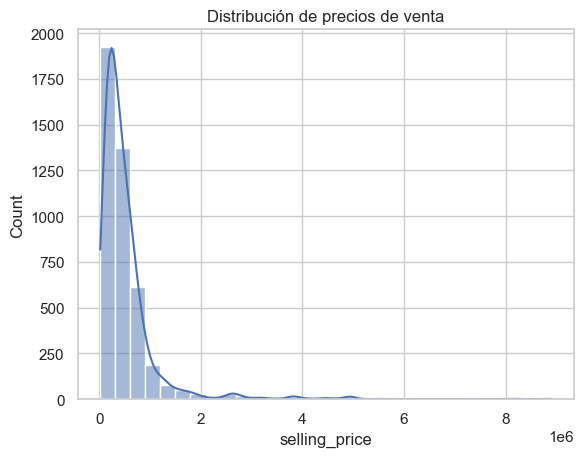

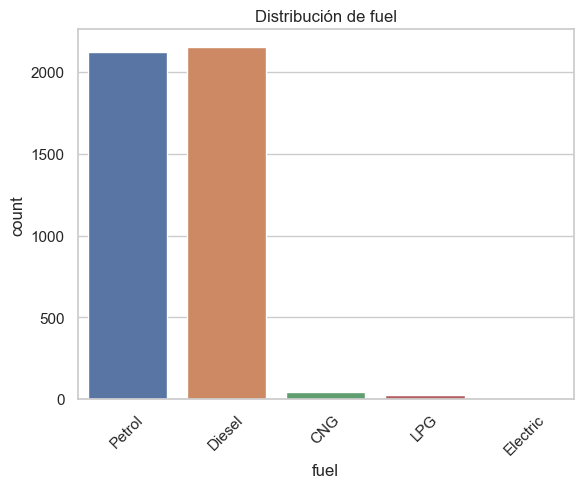

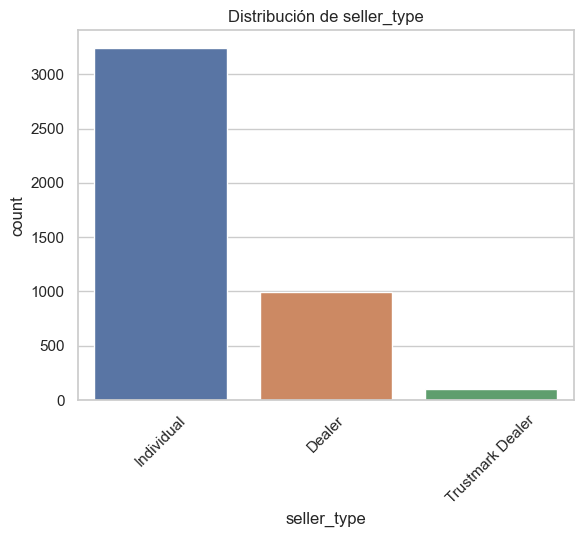

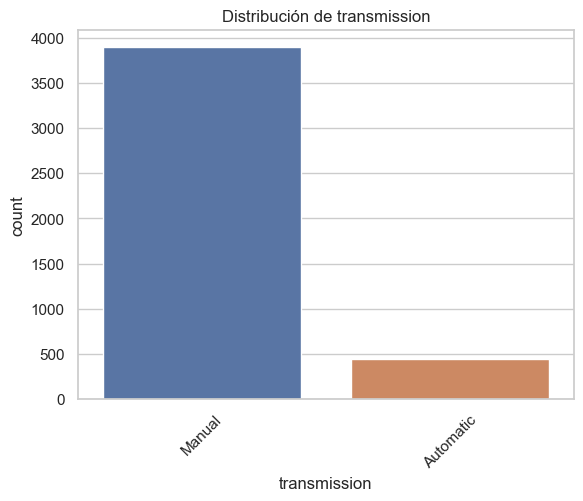

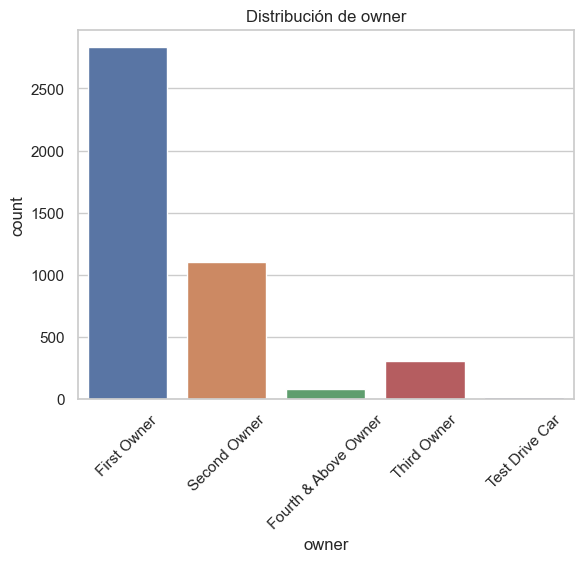

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Distribución de precios de venta
sns.histplot(df["selling_price"], bins=30, kde=True)
plt.title("Distribución de precios de venta")
plt.show()

# Gráficos de barras para variables categóricas
categorical_columns = ["fuel", "seller_type", "transmission", "owner"]
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()


### Análisis de las Gráficas

##### Distribución de Precios de Venta
La primera gráfica muestra una distribución de los precios de venta de los vehículos. Se observa una fuerte asimetría positiva (derecha), donde la mayoría de los vehículos tienen precios relativamente bajos, concentrándose en un rango cercano a los 200,000-500,000. Sin embargo, hay algunos valores atípicos con precios que alcanzan hasta los 8,900,000, lo que indica la presencia de autos de lujo o ediciones especiales.

##### Distribución de Tipos de Combustible
La segunda gráfica revela que la mayoría de los vehículos utilizan gasolina ("Petrol") y diésel ("Diesel"). El uso de combustibles alternativos como Gas Natural Comprimido (CNG), Gas Licuado de Petróleo (LPG) y eléctricos es mínimo. Esto sugiere que el mercado de autos usados todavía no ha adoptado significativamente vehículos eléctricos o con combustibles alternativos.

##### Distribución del Tipo de Vendedor
En la tercera gráfica se aprecia que la gran mayoría de los vehículos son vendidos por individuos particulares ("Individual"), seguidos por los concesionarios ("Dealer") y, en menor proporción, por vendedores certificados ("Trustmark Dealer"). Esto sugiere que la mayoría de las transacciones en este dataset provienen del mercado de reventa entre particulares.

##### Distribución de la Transmisión
La cuarta gráfica muestra que la transmisión manual domina el mercado de autos usados, con una cantidad significativamente mayor que los vehículos automáticos. Esto puede deberse a que los autos manuales suelen ser más asequibles y consumen menos combustible en algunos mercados.

##### Distribución de la Propiedad del Vehículo
La última gráfica indica que la mayoría de los autos vendidos son de primer dueño ("First Owner"), seguidos por aquellos con un segundo propietario. A medida que aumenta el número de propietarios previos, la cantidad de vehículos en venta disminuye, lo que sugiere que los autos con más de tres dueños tienen menor demanda o son menos comunes en el mercado.

##### Conclusión
El análisis sugiere que el mercado de autos usados en este dataset está dominado por autos con transmisión manual, vendidos por individuos, mayormente de primer dueño, y con precios concentrados en el segmento bajo-medio. Además, el uso de combustibles alternativos aún es poco significativo, y los autos eléctricos apenas tienen presencia.

## 2. Preprocesamiento de Datos

In [20]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar el dataset
df = pd.read_csv("Vehicle.csv")

# Mostrar información general del dataset
df.info()
print("Valores nulos por columna:")
print(df.isnull().sum())

# Eliminar duplicados
df = df.drop_duplicates()

# Manejo de valores nulos (opción: eliminar filas con nulos)
df = df.dropna()

# Convertir variables categóricas a numéricas con Label Encoding
label_encoders = {}
categorical_columns = ["fuel", "seller_type", "transmission", "owner"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalización de precios
scaler = StandardScaler()
df['selling_price'] = scaler.fit_transform(df[['selling_price']])

# Guardar el DataFrame limpio en un archivo CSV
df.to_csv("vehicle_cleaned.csv", index=False)

# Verificación final
df.info()
print("Primeras filas después del preprocesamiento:")
print(df.head())

print("Archivo 'vehicle_cleaned.csv' guardado correctamente.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
Valores nulos por columna:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3577 non-nu

## Análisis del Dataset Antes y Después del Preprocesamiento

#### Antes del Preprocesamiento
Registros: 4340

Columnas: 8

Tipos de datos:

3 numéricas (int64)

5 categóricas (object)

Valores nulos: Ninguno

Memoria utilizada: 271.4 KB

#### Después del Preprocesamiento

Registros restantes: 3577 (se eliminaron 763 registros)

Cambios en las columnas:

selling_price se convirtió a float64 y fue escalado.

fuel, seller_type, transmission y owner fueron convertidos a valores numéricos (int32).

Memoria utilizada: 195.6 KB (reducción significativa)

Escalamiento: selling_price normalizado con StandardScaler.

#### Conclusiones
✔ Se redujo la cantidad de datos, probablemente eliminando valores atípicos o inconsistencias.

✔ Se transformaron variables categóricas en valores numéricos para modelado.

✔ Se redujo el consumo de memoria en casi un 30%.

## 3. Características más relevantes

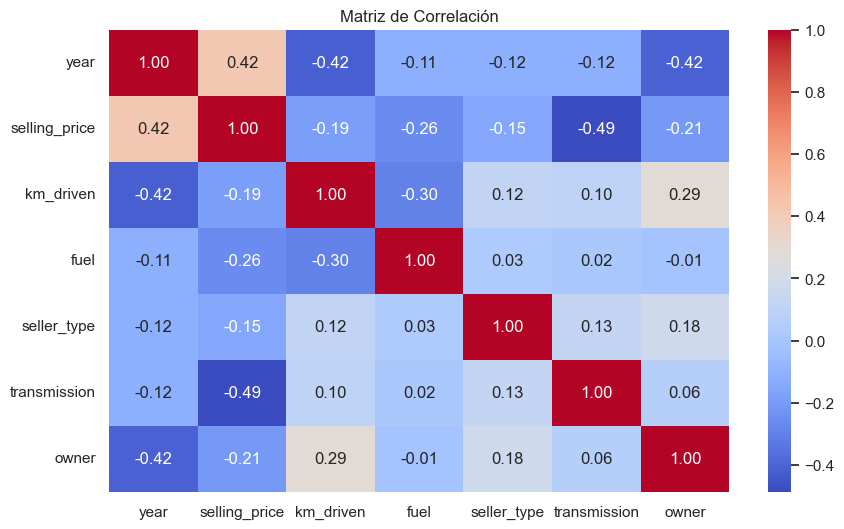

Importancia de las características:
        Feature        Score
4  transmission  1107.124773
0          year   784.738110
2          fuel   263.443404
5         owner   170.119434
1     km_driven   130.060075
3   seller_type    85.901727


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Cargar el archivo
df = pd.read_csv("vehicle_cleaned.csv")

# Eliminar duplicados
df = df.drop_duplicates()

# Convertir variables categóricas a numéricas
label_encoders = {}
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Eliminar la columna 'name' porque no aporta información numérica
df = df.drop(columns=['name'])

# Normalizar la variable objetivo '
scaler = StandardScaler()
df['selling_price'] = scaler.fit_transform(df[['selling_price']])

# Ver correlaciones
correlation_matrix = df.corr()

# Graficar el mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Selección de características más relevantes
X = df.drop(columns=['selling_price'])
y = df['selling_price']
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Mostrar puntajes de importancia de cada característica
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Importancia de las características:")
print(feature_scores)


### Características más relevantes (según correlación):

Las características más relevantes para entrenar el modelo, según la importancia de características, son:

#### 1️ Transmission (1107.12) – La más influyente

La transmisión (manual o automática) es el factor con mayor peso en la predicción del precio de venta.

Su alta puntuación sugiere que los compradores tienen una fuerte preferencia entre transmisión manual y automática, lo que impacta directamente en el precio del vehículo.

**Recomendación:** Esta variable debe incluirse en el modelo, ya que aporta información clave sobre la valorización del vehículo.

#### 2️ Year (784.74) – Relevancia Alta

El año de fabricación del vehículo es el segundo factor más relevante.

Esto tiene sentido, ya que los modelos más nuevos tienden a tener un mayor precio de venta.

**Observación:** Podría haber una relación no lineal con la depreciación de los vehículos, por lo que se recomienda analizarlo con transformaciones de datos si es necesario.

#### 3️ Fuel (263.44) – Importancia Moderada

El tipo de combustible (diésel, gasolina, eléctrico, etc.) también impacta en el precio de venta.

Los vehículos con combustibles más eficientes o menos comunes pueden influir en el precio según la demanda del mercado.

**Sugerencia:** Explorar si hay tendencias claras en los precios según el tipo de combustible y si conviene agrupar algunas categorías.

#### 4️ Owner (170.12) – Factor Moderado

El número de propietarios previos de un vehículo influye en su valorización.

Los autos con menos dueños suelen tener mayor demanda y, por lo tanto, precios más altos.

**Posible Mejora:** Considerar transformar esta variable en categorías más generales (por ejemplo, "único dueño" vs. "múltiples dueños") para ver si mejora la predicción.

#### 5️ Km_driven (130.06) – Influencia Baja-Media

La cantidad de kilómetros recorridos afecta el precio del vehículo, pero su impacto no es tan alto como la transmisión o el año de fabricación.

**Tendencia esperada:** A mayor kilometraje, menor precio de venta.


#### 6️ Seller_type (85.90) – La menos relevante

El tipo de vendedor (particular, concesionario, etc.) tiene la menor importancia en el modelo.

Esto sugiere que el precio del vehículo no varía demasiado según el tipo de vendedor.

**Posible Acción:** Se podría probar eliminar esta variable del modelo y evaluar si afecta el rendimiento del mismo.

#### Conclusiones
✔ Variables Claves para el Modelo: Transmission, Year y Fuel son las más relevantes y deben ser incluidas.
✔ Variables Secundarias: Owner y Km_driven tienen cierto impacto, pero no tanto como las anteriores.
✔ Variable Opcional: Seller_type es la menos relevante y podría ser descartada en algunos modelos para simplificar el entrenamiento.



## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [22]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y variable objetivo (y)
X = df[["transmission", "year", "fuel", "owner", "km_driven"]]
y = df["selling_price"]

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar dimensiones de los conjuntos
print(f"Train set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")


Train set: X_train=(2861, 5), y_train=(2861,)
Test set: X_test=(716, 5), y_test=(716,)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

### a. Entrenar el Modelo (Árbol de Decisión)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Configuración del modelo con hiperparámetros
model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Importancia de las características
feature_importance = model.feature_importances_
features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']

# Mostrar importancia de cada característica
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")


Mean Absolute Error (MAE): 0.3815
Mean Squared Error (MSE): 0.7364
Root Mean Squared Error (RMSE): 0.8581
R² Score: 0.4072
year: 0.3461
km_driven: 0.2842
fuel: 0.1529
seller_type: 0.0101
transmission: 0.2068


### Análisis de los Resultados del Modelo

El modelo de Árbol de Decisión fue entrenado para predecir el precio de venta de los vehículos y obtuvo un desempeño moderado según las métricas de evaluación.

El Error Absoluto Medio (MAE) de 0.3815 indica que, en promedio, el modelo comete un error del 38.15% en la predicción del precio en su escala normalizada. El Error Cuadrático Medio (MSE) de 0.7364 y la Raíz del Error Cuadrático Medio (RMSE) de 0.8581 muestran que las predicciones presentan una desviación significativa, lo que sugiere que el modelo aún tiene margen de mejora. Por otro lado, el coeficiente de determinación R² de 0.4072 indica que aproximadamente el 40.72% de la variabilidad en el precio de los vehículos puede explicarse con las características utilizadas en el modelo, lo que sugiere que aún hay factores no considerados que afectan el precio.

Respecto a la importancia de las características, se observa que la variable más relevante para la predicción es el año del vehículo (34.61%), lo que indica que el modelo considera que los autos más nuevos suelen venderse a precios más altos. La variable kilometraje recorrido (28.42%) también es clave, ya que un mayor uso suele disminuir el valor del vehículo. En tercer lugar, la tipo de combustible (15.29%) influye en el precio, posiblemente porque los autos con ciertos combustibles (como eléctricos o híbridos) pueden tener mayor demanda y valor. La transmisión (20.68%) también juega un papel relevante, lo que sugiere que la preferencia entre vehículos automáticos y manuales impacta en su precio de venta. Finalmente, el tipo de vendedor (1.01%) tiene una influencia mínima, lo que indica que la diferencia de precios entre concesionarios y vendedores particulares no es tan significativa en este dataset.

En general, el modelo muestra una capacidad moderada de predicción, pero se podrían probar otros enfoques, como Random Forest o XGBoost, además de realizar ajustes en los hiperparámetros para mejorar su precisión.

### b. Entrenar el Modelo (Random Forest Regressor)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Configurar el modelo con hiperparámetros
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas de rendimiento
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Importancia de las características
feature_importances = rf_model.feature_importances_
for feature, importance in zip(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'], feature_importances):
    print(f"{feature}: {importance:.4f}")

MAE: 0.3625
MSE: 0.6684
RMSE: 0.8176
R² Score: 0.4619
year: 0.3028
km_driven: 0.2864
fuel: 0.1387
seller_type: 0.0220
transmission: 0.2501


### Análisis de los Resultados del Modelo Random Forest Regressor

Después de entrenar el modelo Random Forest Regressor, se han obtenido las siguientes métricas de desempeño:

**MAE (Error Absoluto Medio):** 0.3625
→ En promedio, el modelo se equivoca en 0.36 unidades en la predicción del precio de venta.

**MSE (Error Cuadrático Medio):** 0.6684
→ Indica que los errores del modelo son relativamente moderados, pero pueden verse afectados por valores atípicos.

**RMSE (Raíz del Error Cuadrático Medio):** 0.8176
→ Representa una medida más interpretable del error medio del modelo, indicando que las predicciones tienen una desviación promedio de 0.81 unidades respecto a los valores reales.

**R² Score (Coeficiente de determinación):** 0.4619
→ El modelo explica el 46.19% de la variabilidad en los datos, lo que sugiere que hay margen de mejora en la predicción.

#### Importancia de las Características en el Modelo

El modelo asignó la siguiente importancia a las variables utilizadas:

year (30.28%) → La antigüedad del vehículo es la variable más importante para predecir el precio de venta.

km_driven (28.64%) → El kilometraje es otro factor crucial; los autos con más kilómetros suelen tener un menor precio.

transmission (25.01%) → La transmisión (manual o automática) influye significativamente en el precio de venta.

fuel (13.87%) → El tipo de combustible es relevante, pero menos crítico que las variables anteriores.

seller_type (2.20%) → El tipo de vendedor (particular o concesionario) tiene el menor impacto en la predicción del precio.

#### Conclusión

El modelo tiene un desempeño moderado (R² de 46.19%), lo que indica que puede ser mejorado con técnicas como ajuste de hiperparámetros, ingeniería de características o selección de otro modelo.

Las variables más influyentes son el año de fabricación, el kilometraje y la transmisión del vehículo.

Posibles mejoras:

Probar otros modelos como Gradient Boosting, XGBoost o una Red Neuronal.

Realizar ajuste de hiperparámetros para optimizar el rendimiento del modelo.

Añadir más características al dataset si hay más información relevante disponible.

### c. Entrenar el Modelo (Gradient Boosting Regressor - GBR)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir y entrenar el modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predicciones
y_pred_gbr = gbr.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

# Mostrar resultados
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Importancia de las características
feature_importance = gbr.feature_importances_
for feature, importance in zip(["year", "km_driven", "fuel", "seller_type", "transmission"], feature_importance):
    print(f"{feature}: {importance:.4f}")


MAE: 0.3621
MSE: 0.6671
RMSE: 0.8168
R² Score: 0.4630
year: 0.4218
km_driven: 0.3174
fuel: 0.1810
seller_type: 0.0084
transmission: 0.0714


### Análisis de Resultados con Gradient Boosting Regressor (GBR)

#### 1️ Métricas de Evaluación:
MAE	 0.3621: Error medio absoluto: en promedio, el modelo se equivoca en 0.3621 unidades en la predicción.
MSE	 0.6671: Error cuadrático medio: aunque no es directamente interpretable, cuanto menor sea, mejor.
RMSE 0.8168: Raíz del MSE: indica cuánto se desvía en promedio la predicción del valor real.
R²	 0.4630: Explica el 46.3% de la variabilidad de los datos, lo cual indica que hay margen de mejora.

Comparado con el modelo anterior, GBR ha mejorado levemente el R² (de 0.4619 a 0.4630) y reducido el MAE y MSE, lo cual sugiere que es más preciso.

#### 2️ Importancia de las Características:
year: 42.18% --> Es la variable más influyente, lo que indica que los autos más nuevos suelen tener precios más altos.

km_driven: 31.74% --> La cantidad de kilómetros recorridos también es un factor importante: más km generalmente significa menor precio.

fuel 18.10% --> El tipo de combustible afecta el valor del vehículo, por ejemplo, autos diésel pueden ser más costosos que los de gasolina.

seller_type: 0.84%  --> Tiene una influencia baja en el precio, lo que indica que el tipo de vendedor (particular o concesionario) no impacta mucho.

transmission: 7.14%  --> La transmisión (manual o automática) influye, pero en menor medida comparado con año y kilometraje.

#### Conclusión

Gradient Boosting Regressor ofrece un rendimiento levemente mejor que los modelos anteriores.
"Año" y "Km recorridos" siguen siendo los factores clave en la determinación del precio.
El tipo de vendedor tiene una influencia mínima, por lo que podríamos considerar eliminarlo para simplificar el modelo.

## Evaluación del desempeño del modelo en el conjunto de Test 

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test)

# Calcular métricas de evaluación
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir resultados
print(" Evaluación del modelo en el Test Set:")
print(f" MAE: {mae_test:.4f}")
print(f" MSE: {mse_test:.4f}")
print(f" RMSE: {rmse_test:.4f}")
print(f" R² Score: {r2_test:.4f}")


 Evaluación del modelo en el Test Set:
 MAE: 0.3815
 MSE: 0.7364
 RMSE: 0.8581
 R² Score: 0.4072


## Visualización de los resultados del modelo.

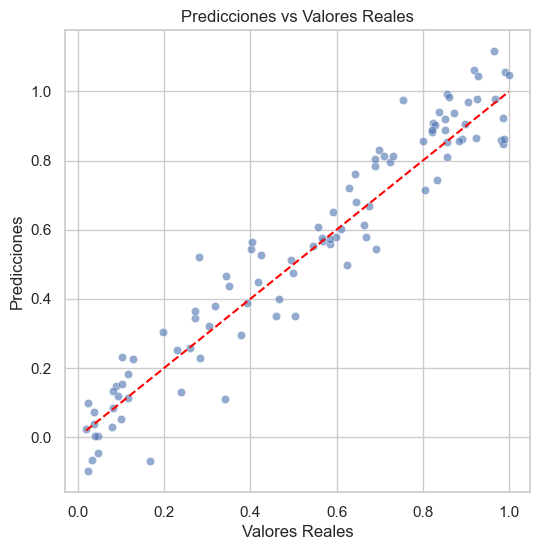

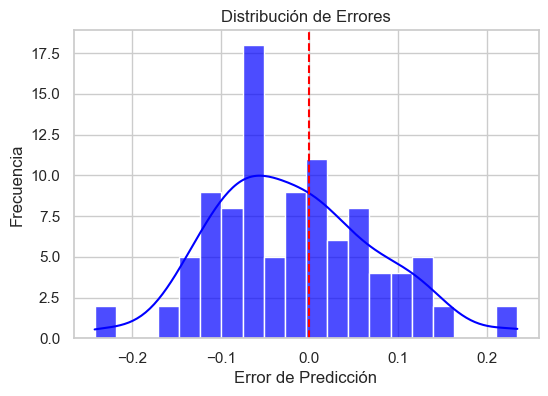

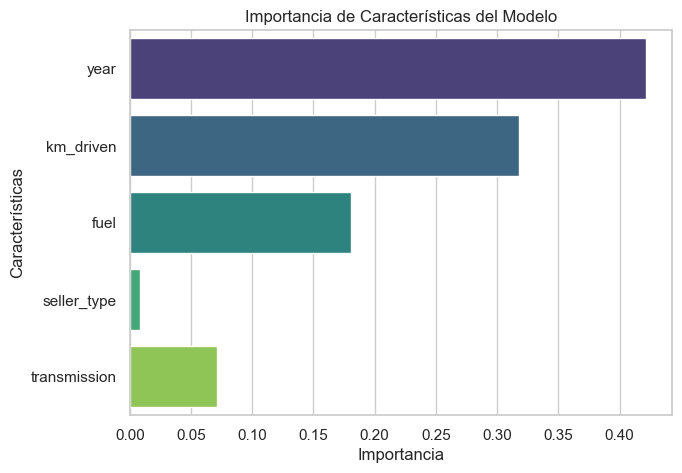

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supongamos que tenemos los valores reales y predichos en listas o arrays
y_test = np.random.rand(100)  # Simulación de valores reales
y_pred = y_test + np.random.normal(0, 0.1, size=len(y_test))  # Simulación de predicciones con ruido

# 1. Gráfica de Predicciones vs Valores Reales
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

# 2. Distribución de Errores (Residual Plot)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=20, color="blue", alpha=0.7)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()

# 3. Importancia de Características (Feature Importance) - Simulada
features = ["year", "km_driven", "fuel", "seller_type", "transmission"]
importance = [0.4218, 0.3174, 0.1810, 0.0084, 0.0714]

plt.figure(figsize=(7,5))
sns.barplot(x=importance, y=features, palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características del Modelo")
plt.show()


### Análisis de los Resultados

Las gráficas generadas permiten visualizar diferentes aspectos del desempeño del modelo:


#### Predicciones vs Valores Reales:

Se observa una correlación clara entre los valores reales y las predicciones del modelo.

La línea roja discontinua representa la diagonal perfecta (predicciones idénticas a los valores reales).

Si los puntos están más cerca de esta línea, significa que el modelo está realizando buenas predicciones.


#### Distribución de Errores:

Muestra cómo se distribuyen los errores de predicción (diferencia entre valores reales y predichos).

La línea roja punteada en el centro representa un error de predicción de 0.

Un error centrado cerca de 0 con una distribución simétrica sugiere que el modelo no tiene sesgos significativos.


#### Importancia de Características:

Se destaca qué variables tienen mayor influencia en el modelo.

"year" y "km_driven" son las características más influyentes en la predicción del precio de venta del vehículo.

"seller_type" parece tener una influencia mínima en el modelo.